Introduction 

Over the last decade, there has been an increasing interest in food production in regards to the rising global population. This is largely due to articles like the one the United Nations produced concerning an alarming population increase in developing countries, showing the population rising to 9.8 billion people by 2050.  This estimate is based on 2010 censuses from 233 countries and other demographic data. While this data could be grossly hyped up, as much media tends to do, it raised a pivotal question: how will we feed the world? 

Sci-Fi genres aside, growing economic and health-related awareness in the United States could be seen through various media outlets, including an enthusiastic Michelle Obama. Through this raised awareness, one of the working hypotheses of many scientists and economists has been to reduce meat intake, and increase produce and vegetable-protein intakes.  Vegetable protein and produce production were long thought to be more economical in comparison to meat production in terms of space, time, and energy, but the choices in such matters have been limited. Recently, more plant alternative proteins have been making the news and hitting markets. However, what I aim to explore in this paper is whether or not consumers are following the media blitzes through actual expenditure. 


Hypothesis

If American consumers are becoming increasingly food-conscious, then they are also buying more food-conscious and we can see that in the form of buying less meat. Should this be true across five years of data, then applications would include helping the FDA develop more guidelines for lab-grown vegetable and meat protein alternatives; more dedicated research to long-term effects on health and resources; and global food production initiatives. If the UN’s population prediction were accurate, it would be necessary to have these assurances for safety and health reasons.


Method

Using the Consumer Expenditure reports from the Bureau of Labor Statistics from 2010-2014, I initially explored the most recent five years of food data. I used the diary data, specifically pulling in the fmld CSV files, as the diary data is collected over 2 consecutive weeks, 4 times a year. It is meant specifically for smaller ticket items such as food purchases while the interview data is used for larger ticket items, such as cars and houses. There are four fmld CSV files in each diary data zip file, showing the data from each quarter that the surveyors were able to collect. This data has approximately 538 columns and 6,000-11,000 rows. Each column represents a different purchase while each row represents a different household. Using cat method in the command line, I was able to combine the four quarters for annual data concerning how much meat and produce each household bought for that year. The basic command line function for this was:


In [ ]:
$ cat < fmld141.csv <(tail +3 fmld142.csv) <(tail +3 fmld143.csv) <(tail +3 fmld144.csv) > veg14.csv

Doing this for each year, I was able to get the amount spent on each food item, which I then made columns for in Python. I labeled one column ‘MEAT’, which comprised of ‘BEEF’, ‘POULTRY’, ‘PORK’, ‘SEAFOOD’, and ‘OTHMEAT’. Next, I made a column for ‘PRODUCE’, comprised of ‘FRSHFRUIT’, ‘FRSHVEG’, ‘PROCFRUT’, and ‘PROCVEG’.  Below are the results and analysis, followed by a revised method and analysis.

Results and Analysis

One of the main components that I first explored was the money spent on meat versus produce. After initial results, I noticed that meat consumption seemed to be much higher. This wasn’t inline with my initial hypothesis, nor was it the suggested USDA diet. While I know that not everyone follows the food pyramid to the tee, I remembered that on the general whole, meat was more expensive than produce. I checked this across three different variables: family size, region, and age. 


In [36]:
import pandas as pd
import numpy as np
import operator as o
import matplotlib.pylab as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [50]:
veg14 = pd.read_table('/Users/reneehosogi/Documents/GitHub_Clones/Veg_Project/diaries10-14/veg14.csv', sep=',')
veg13 = pd.read_table('/Users/reneehosogi/Documents/GitHub_Clones/Veg_Project/diaries10-14/veg13.csv', sep=',')
veg12 = pd.read_table('/Users/reneehosogi/Documents/GitHub_Clones/Veg_Project/diaries10-14/veg12.csv', sep=',')
veg11 = pd.read_table('/Users/reneehosogi/Documents/GitHub_Clones/Veg_Project/diaries10-14/veg11.csv', sep=',')
veg10 = pd.read_table('/Users/reneehosogi/Documents/GitHub_Clones/Veg_Project/diaries10-14/veg10.csv', sep=',')
low_memory=False


In [ ]:
# Just checking nulls 

veg14.FOODTOT.isnull().sum()
veg13.FOODTOT.isnull().sum()
veg12.FOODTOT.isnull().sum()
veg11.FOODTOT.isnull().sum()
veg10.FOODTOT.isnull().sum()

In [51]:
# Creating the new columns for the overall meat and produce consumption

veg14['MEAT']=veg14.BEEF + veg14.POULTRY + veg14.PORK + veg14.SEAFOOD + veg14.OTHMEAT
veg14['PRODUCE']= veg14.FRSHFRUT + veg14.FRSHVEG + veg14.PROCFRUT + veg14.PROCVEG 

veg13['MEAT']=veg13.BEEF + veg13.POULTRY + veg13.PORK + veg13.SEAFOOD + veg13.OTHMEAT
veg13['PRODUCE']= veg13.FRSHFRUT + veg13.FRSHVEG + veg13.PROCFRUT + veg13.PROCVEG 

veg12['MEAT']=veg12.BEEF + veg12.POULTRY + veg12.PORK + veg12.SEAFOOD + veg12.OTHMEAT
veg12['PRODUCE']= veg12.FRSHFRUT + veg12.FRSHVEG + veg12.PROCFRUT + veg12.PROCVEG 

veg11['MEAT']=veg11.BEEF + veg11.POULTRY + veg11.PORK + veg11.SEAFOOD + veg11.OTHMEAT
veg11['PRODUCE']= veg11.FRSHFRUT + veg11.FRSHVEG + veg11.PROCFRUT + veg11.PROCVEG 

veg10['MEAT']=veg10.BEEF + veg10.POULTRY + veg10.PORK + veg10.SEAFOOD + veg10.OTHMEAT
veg10['PRODUCE']= veg10.FRSHFRUT + veg10.FRSHVEG + veg10.PROCFRUT + veg10.PROCVEG 


Initial Visuals

Meat and produce consumption in 2014, measured by family size. Produce is scaled to 600 USD while meat is scaled to P$P1200.

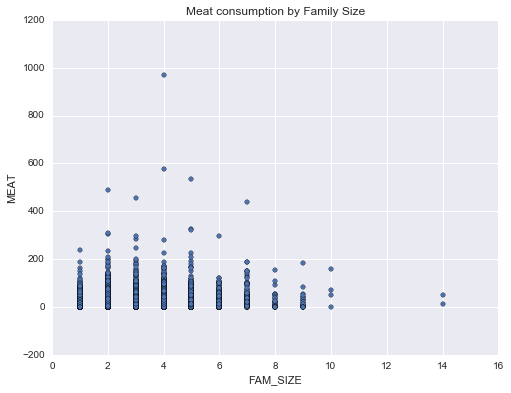

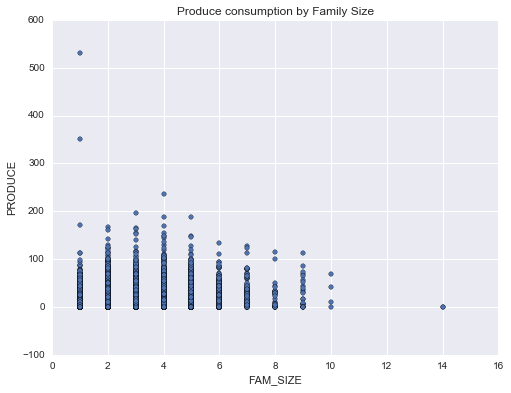

In [52]:
veg14.plot(kind='scatter', x='FAM_SIZE', y='MEAT', title='Meat consumption by Family Size')
veg14.plot(kind='scatter', x='FAM_SIZE', y='PRODUCE', title='Produce consumption by Family Size')

Meat and produce consumption in 2014, measured by age. Produce is scaled to $600 while meat is scaled to $1200.

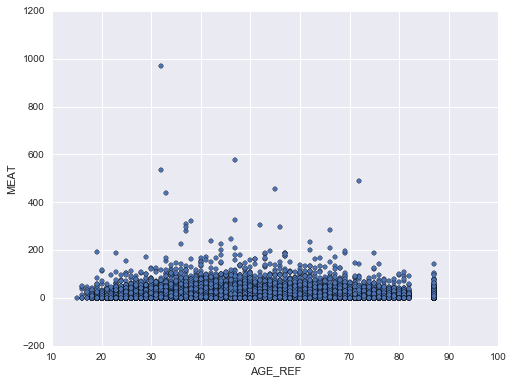

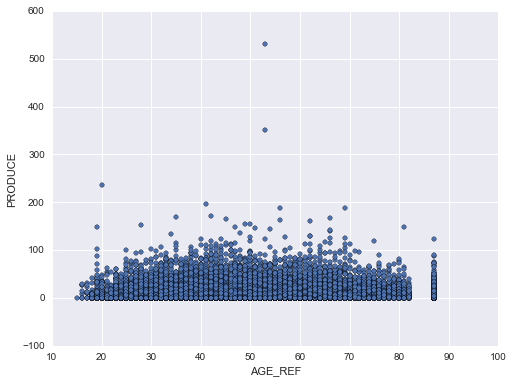

In [54]:
veg14.plot(kind='scatter', x='AGE_REF', y='MEAT')
veg14.plot(kind='scatter',x='AGE_REF', y='PRODUCE')

Meat and produce consumption in 2014, measured by region. Produce is scaled to 600 USD while meat is scaled to 1200 USD. Please see data dictionary for Region codes. 

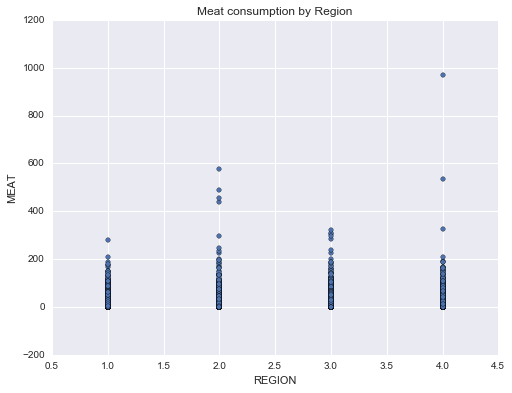

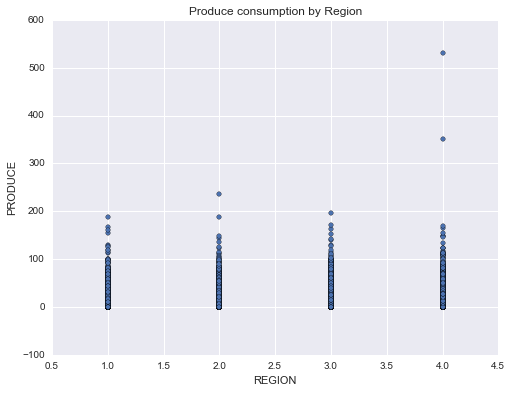

In [55]:
veg14.plot(kind='scatter', x='REGION', y='MEAT', title='Meat consumption by Region')
veg14.plot(kind='scatter', x='REGION', y='PRODUCE', title='Produce consumption by Region')

One of the main components that I first explored was the money spent on meat versus produce. After initial results, I noticed that meat consumption seemed to be much higher. This wasn’t inline with my initial hypothesis, nor was it the suggested USDA diet. While I know that not everyone follows the food pyramid to the tee, I remembered that on the general whole, meat was more expensive than produce. I checked this across three different variables: family size, region, and age. 

Once I noted this, I used the US Department of Labor’s annual price reports to average the yearly costs of meat, produce, and processed produce to come up with average prices per unit of food type. Below is the table of price per pound that I used to divide the cost of each food product:

| Year   | Beef        | Poultry     |  Pork       | Other Meat | Fresh Fruits| Fresh Veg |Proc Fruits | Proc. Veg  |
|        | (per 500 g) | (per 500 g) | (per 500 g) | (per 500 g)| (per 500 g) |(per 500 g)| (per 500 g)|(per 500 g) |
| :----: |:-----------:|:-----------:|:---------:|:----------:|:------------:|:----------:|:----------:|:----------:|
| 2014   |    $5.71    |    $2.04    |   $3.83   |   $3.01    |   $1.49      |   $1.57    |   $2.53    |   $1.47    |
| 2013   |    $4.76    |    $2.02    |   $3.43   |   $3.05    |   $1.29      |   $1.49    |   $2.51    |   $1.42    |
| 2012   |    $4.57    |    $1.97    |   $3.37   |   $2.92    |   $1.34      |   $1.42    |   $2.66    |   $1.44    |
| 2011   |    $4.34    |    $1.89    |   $3.35   |   $3.15    |   $1.33      |   $1.58    |   $2.76    |   $1.42    |
| 2010   |    $5.26    |    $1.96    |   $3.10   |   $3.22    |   $1.32      |   $1.15    |   $2.47    |   $1.33    |

Unfortunately, regional costs per units weren’t posted, which would have given the numbers above another level of accuracy. The prices averaged were taken from the US averages of different product types, including different cuts of meats and different types of produce. Please see the attached appendix for the list of cuts of meat and types of produce factored into the price per unit averages.

Next, I made two new columns for number of meat units purchased and number of produce units purchased by taking each type of meat (beef, poultry, pork, and other meat) and each type of produce (fresh fruits, fresh vegetables, processed fruits, and processed vegetables) and dividing the columns by the appropriate price per unit. 

The numbers that came out for meat in 2014 looked like this:


In [ ]:
# Add in the units 
veg14['MEAT_UNIT']= (veg14.BEEF/5.71) + (veg14.POULTRY/2.04) + (veg14.PORK/3.83) + veg14.SEAFOOD + (veg14.OTHMEAT/3.01)
veg14['PROD_UNIT']= (veg14.FRSHFRUT/1.49) + (veg14.FRSHVEG/1.57) + (veg14.PROCFRUT/2.53) +(veg14.PROCVEG/1.47)

veg13['MEAT_UNIT']= (veg13.BEEF/4.76) + (veg13.POULTRY/2.02) + (veg13.PORK/3.43) + veg13.SEAFOOD + (veg13.OTHMEAT/3.05)
veg13['PROD_UNIT']= (veg13.FRSHFRUT/1.29) + (veg13.FRSHVEG/1.49) + (veg13.PROCFRUT/2.51) +(veg13.PROCVEG/1.42)

veg12['MEAT_UNIT']= (veg12.BEEF/4.57) + (veg12.POULTRY/1.97) + (veg12.PORK/3.37) + veg12.SEAFOOD + (veg12.OTHMEAT/2.92)
veg12['PROD_UNIT']= (veg12.FRSHFRUT/1.34) + (veg12.FRSHVEG/1.42) + (veg12.PROCFRUT/2.66) + (veg12.PROCVEG/1.44)

veg11['MEAT_UNIT']= (veg11.BEEF/4.34) + (veg11.POULTRY/1.89) + (veg11.PORK/3.35) + veg11.SEAFOOD + (veg11.OTHMEAT/3.15)
veg11['PROD_UNIT']= (veg11.FRSHFRUT/1.33) + (veg11.FRSHVEG/1.58) + (veg11.PROCFRUT/2.76) + (veg11.PROCVEG/1.42)

veg10['MEAT_UNIT']= (veg10.BEEF/5.26) + (veg10.POULTRY/1.96) + (veg10.PORK/3.10) + veg10.SEAFOOD + (veg10.OTHMEAT/3.22)
veg10['PROD_UNIT']= (veg10.FRSHFRUT/1.32) + (veg10.FRSHVEG/1.15) + (veg10.PROCFRUT/2.47) +(veg10.PROCVEG/1.33)

In [ ]:
veg14.plot(kind='hist', x='MEAT_UNIT', y='REGION')

In [ ]:
fig, axs = plt.subplots(1,2)

veg14['PRODUCE'].plot(x='FAM_SIZE', y='PRODUCE', ax=axs[0])
veg14['MEAT'].plot(x='FAM_SIZE', y='MEAT', ax=axs[1])

In [ ]:
veg14.plot(kind='scatter', y='MEAT', x='REGION', alpha=0.2)

In [ ]:
fig, ax = plt.subplots()
ax2, ax3 = ax.twinx(), ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.25))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=1.5)

veg14.MEAT_UNIT.plot(ax=ax, style='b-')
veg14.PROD_UNIT.plot(ax=ax2, style='r-', secondary_y=True)
veg14.FOODTOT.plot(ax=ax3, style='g-')

plt.subplots_adjust(hspace=0.5)
plt.ylabel('USD')
plt.xlabel ('Unique ID')

In [ ]:
plt.figure();
veg14['FOODTOT'].diff().hist()

In [ ]:
sns.lmplot(x='AGE_REF', y='MEAT_UNIT', data=veg14, aspect=1.5, scatter_kws={'alpha':0.2})

In [ ]:
veg14.plot(kind='box', column='REGION', by='MEAT_UNIT')